In [65]:
# Import Pkgs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [69]:
# read the csv file 
players_stats_df = pd.read_csv('Fortnite_players_stats.csv')

## based on number of Solo kills predict Solo kills
# The more you kill enemies, more often you gonna win?
soloKillsX = players_stats_df[['Solo kd']]
soloWinRatioY = players_stats_df['Solo winRatio']

regr = linear_model.LinearRegression()
regr.fit(soloKillsX, soloWinRatioY)
# The model's regression coefficients
print(regr.coef_)

[3.93996792]


In [82]:
# first matches you are mostly playing aganst easy bots so easy to kill, the more you play, more you face high level players
predicted = regr.predict([[0.84]])
print(predicted)

[1.06212987]


In [74]:
# TRAINING AND TESTING DATA
X = np.array(soloKillsX) 
y = np.array(soloWinRatioY)
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=72)
# We can see that data have been shuffled by "train_test_split
X_train

array([[1.07],
       [2.37],
       [1.19],
       ...,
       [1.24],
       [1.19],
       [1.14]])

In [75]:
# initialize and fit to your train data and predict on test data

regr.fit(X_train, y_train)
preds = regr.predict(X_test)
# evaluate
mean_absolute_error(y_test, preds) == np.mean(np.abs(y_test - preds))
# get the variance of (absolute) residuals
np.var(np.abs(y_test - preds))
resultQ2a = np.var((y_test - preds))
print('mean_absolute_error:', resultQ2a)

resultQ2s = mean_squared_error(soloKillsX, soloWinRatioY, squared=False)

print('mean_squared_error:', resultQ2s)

mean_absolute_error: 6.3448734515196525
mean_squared_error: 5.332080615799033


Text(0.5, 1.0, 'Solo Kills Ratio vs. Solo Win Ratio')

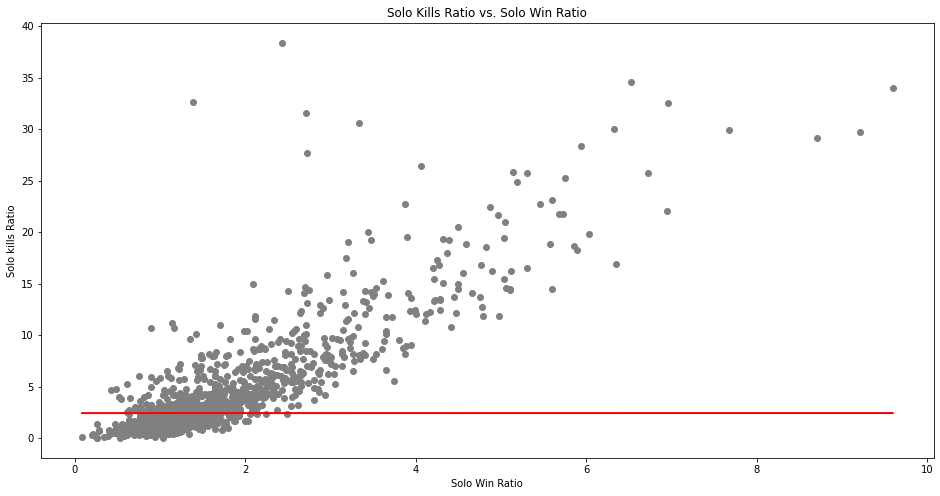

In [76]:
# Plotting the TRAIN DATA
plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.ylabel('Solo kills Ratio')
plt.xlabel('Solo Win Ratio')
plt.title('Solo Kills Ratio vs. Solo Win Ratio')

In [77]:
# Train a Linear Regression Model
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(fit_intercept = True) # Fit intercept is the "b" parameter (y = b + mx)
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
# Making Predictions
new_value = [[5.0]]
new_prediction = lr.predict(new_value)
new_prediction

array([17.26542205])

In [79]:
import joblib

model_file = open("givenKillRatioPredictWinRatio.pkl","wb")
joblib.dump(lr,model_file)
model_file.close()